In [6]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Function definitions


In [31]:
genres = {
    'blues':0,
    'classical':1,
    'country':2,
    'disco':3,
    'hiphop':4,
    'jazz':5,
    'metal':6,
    'pop':7,
    'reggae':8,
    'rock':9
}
def convertlabel(df):
    def convert(x):
        return genres.get(x)
    df['label'] = df.apply(lambda row: convert(row['label']), axis = 1)
    return df['label']

def preprocess(filename):
    df = pd.read_csv(filename)
    X = df.drop(['label', 'filename', 'length', 'harmony_var', 'rms_mean'], axis = 1)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    y = convertlabel(df)
    return X,y

EDA

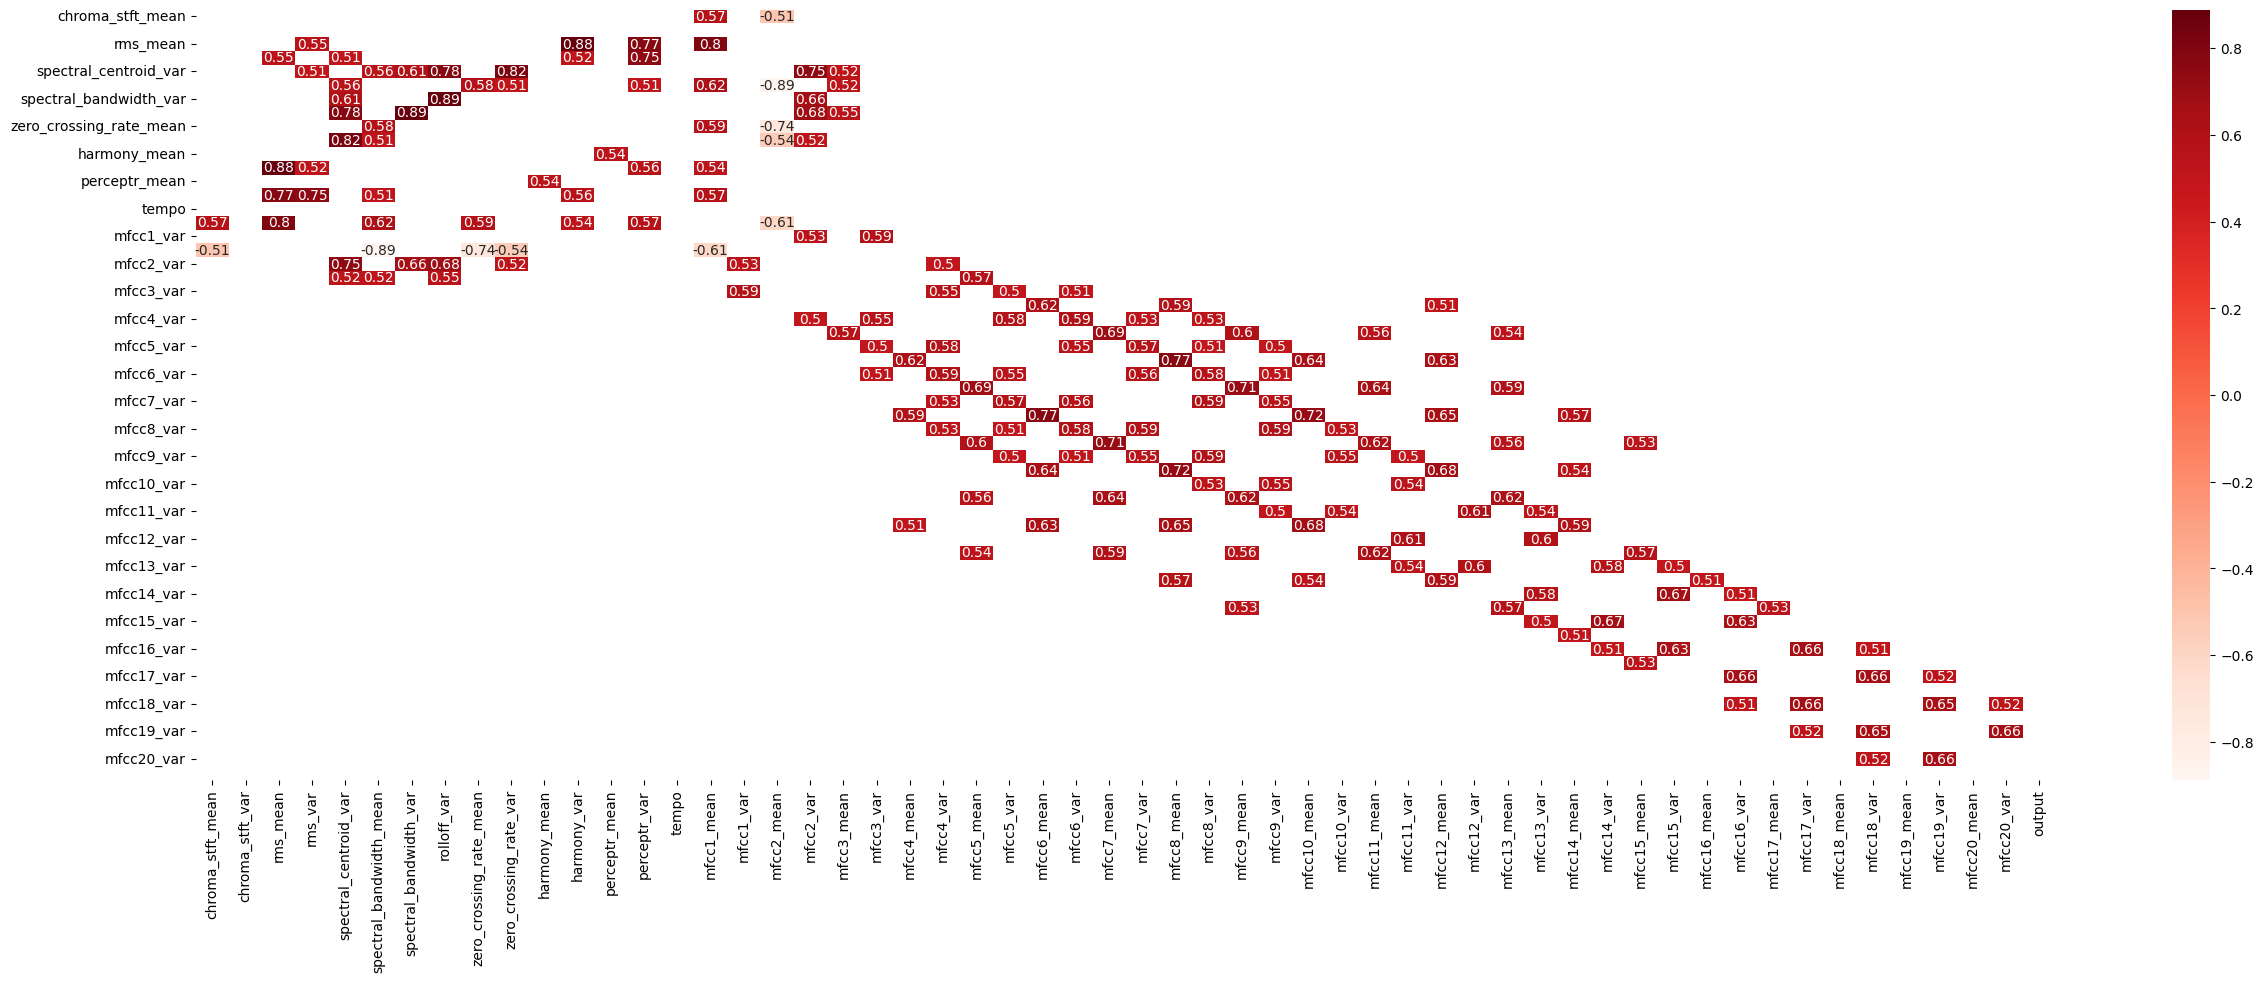

In [16]:
df = pd.read_csv('./train.csv')
df['output'] = convertlabel(df)
df = df.drop(['label', 'filename', 'length'], axis = 1)

dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [34]:
X,y = preprocess('./train.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', p = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9138410227904391


OUTPUT GRAPH

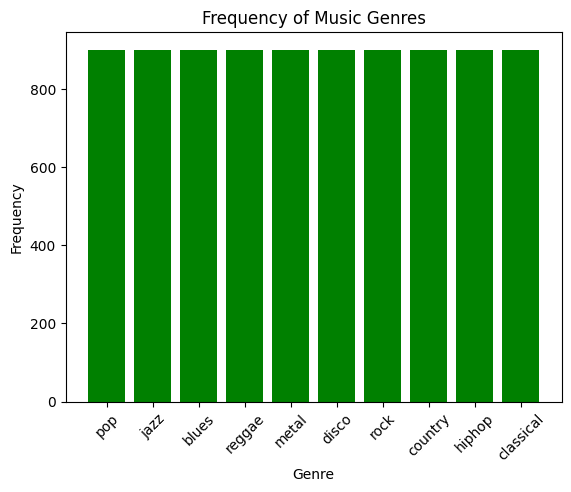

In [33]:
df = pd.read_csv('./train.csv')
output_count = df['label'].value_counts()

plt.bar(output_count.index, output_count.values, color='green')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Frequency of Music Genres')
plt.xticks(rotation=45) 
plt.show()

Test and submission

In [5]:
testdf = pd.read_csv('./test.csv')
id = testdf['id']
X_val = testdf.drop(['length', 'id'], axis = 1)
scaler = StandardScaler()

X_val = scaler.fit_transform(X_val)


y_val = model.predict(X_val)
submission = pd.DataFrame({'id': id, 'label' : y_val})
print(submission.head())
submission.to_csv('final.csv', index = False)

     id  label
0  9586      9
1  6984      6
2  7047      7
3  2510      2
4    34      0
